In [63]:
import os
import sys
parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)
from results_data import ResultsCELI
from results_data import open_pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

globalfont = 'DejaVu Sans'

In [64]:
matplotlib.font_manager.findfont('Cambria')

'/home/jfaulkner31/mambaforge3/envs/openmc-env/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [65]:
out = open_pkl(filename='homogenized_case1_upTo_stepNum_3.pkl')

In [66]:
# available functions:
# out.print_case_settings()
# out.get_BOS_keffs()
# out.get_BOS_isotope()
# out.get_BOS_power()
# out.get_corrector_keffs()
# out.get_BOS_AO
# need to make:
# out.get_corrector_power()
# out.get_corrector_isotope()

In [67]:
out.print_case_settings()

fissionable_mats: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]
fissionable_mats_vols: [60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574]
residual_number_density: 1e-20
include_non_fission_material_power: True
print_transport_powers: True
system_IHM_mass_grams: 72133.56
specific_power: [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
steplength_days: [0.5, 2, 2.5, 5, 10, 10, 10, 10, 20, 20, 20, 20, 20, 50, 50, 50, 50]
origen_predictor_divs: 2
addnuxdictbase: addnuxDicts/addnux3Dict.dict
base_triton: homogenized_base.inp
origen_base: baseOrigenFile.inp
origenResults_F71dir: OrigenResults_F71dir
MonteCarloResults_F33dir: MonteCarloResults_F33
Nprocs: 35
machinefile: nodes.1524583
tmp

In [68]:
BOS_keffs, BOS_sigmas, bu, time = out.get_BOS_keffs()

In [69]:
u5, bu, time = out.get_BOS_isotope(material_id=101, isotope='U-235')

In [70]:
out.get_corrector_keffs(step_num=0)

No corrector iterated keffs for step 0 since we did not do correc to iterations to get to this result.


(None, None)

In [71]:
out.keff_all

{0: {-1: ' best estimate system k-eff 1.23314 + or - 0.00018\n',
  0: ' best estimate system k-eff 1.19980 + or - 0.00019\n',
  1: ' best estimate system k-eff 1.19936 + or - 0.00020\n',
  2: ' best estimate system k-eff 1.19939 + or - 0.00018\n'},
 1: {-1: ' best estimate system k-eff 1.19963 + or - 0.00025\n',
  0: ' best estimate system k-eff 1.17955 + or - 0.00018\n',
  1: ' best estimate system k-eff 1.17930 + or - 0.00016\n',
  2: ' best estimate system k-eff 1.17931 + or - 0.00019\n'},
 2: {-1: ' best estimate system k-eff 1.17944 + or - 0.00016\n',
  0: ' best estimate system k-eff 1.17473 + or - 0.00016\n',
  1: ' best estimate system k-eff 1.17449 + or - 0.00018\n',
  2: ' best estimate system k-eff 1.17482 + or - 0.00019\n'},
 3: {-1: ' best estimate system k-eff 1.17422 + or - 0.00016\n',
  0: ' best estimate system k-eff 1.16707 + or - 0.00017\n',
  1: ' best estimate system k-eff 1.16696 + or - 0.00016\n',
  2: ' best estimate system k-eff 1.16708 + or - 0.00016\n'}}

In [72]:
out.print_methods()

available methods for postprocessing results:
out.print_case_settings()
out.get_BOS_keffs()
out.get_BOS_isotope()
out.get_BOS_power()
out.get_corrector_keffs()
out.get_BOS_AO

Plotting:
out.plot_BOS_power_map
out.plot_BOS_power_2d
out.plot_all_power_map
out.plot_BOS_isotopics_map



Need to make the following still
out.get_corrector_power()
out.get_corrector_isotope()
out.get_corrector_AO()


In [73]:
_, _, p = out.get_BOS_power()
p[0].values()

dict_values([0.026490132450662247, 0.038370191850959245, 0.050890254451272245, 0.061835309176545866, 0.07094535472677362, 0.07818039090195449, 0.08317541587707937, 0.08595042975214874, 0.08605043025215124, 0.08379541897709486, 0.07922539612698062, 0.07232036160180798, 0.06316531582657911, 0.05209526047630237, 0.03936519682598412, 0.027005135025675118])

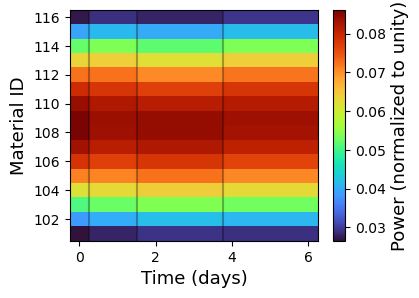

In [92]:
parr, BOS_time = out.plot_BOS_power_map(normalize=True, figsize=(4,3), cmap='turbo', fontname=globalfont,fontsize=13)

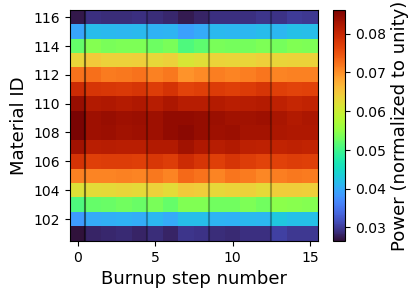

In [75]:
parr = out.plot_all_power_map(normalize=True, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

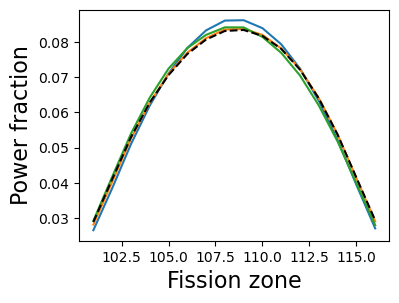

In [76]:
parr, BOS_time = out.plot_BOS_power_2d(normalize=True, figsize=(4,3), fontname=globalfont,fontsize=16)

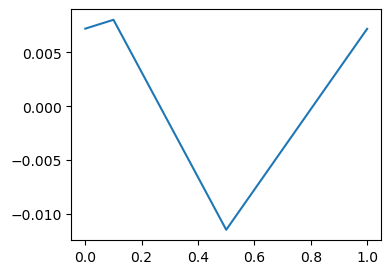

In [77]:
t, b, ao = out.get_BOS_AO()
figAO, axAO = plt.subplots(figsize=(4,3))
axAO.plot(t,ao)

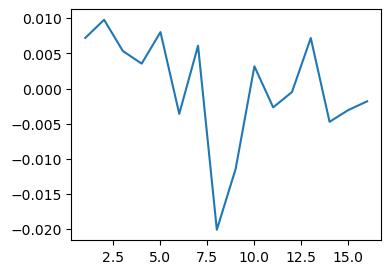

In [78]:
x, ao = out.get_all_AO()
figAO, axAO = plt.subplots(figsize=(4,3))
axAO.plot(x,ao)

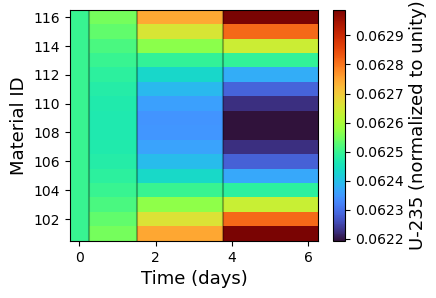

In [79]:
u235arr = out.plot_BOS_isotopics_map(isotope='U-235',
                       normalize=True, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

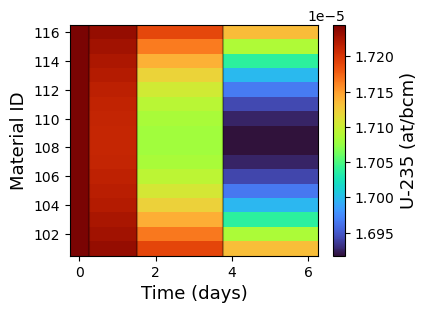

In [80]:
u235arr = out.plot_BOS_isotopics_map(isotope='U-235',
                       normalize=False, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

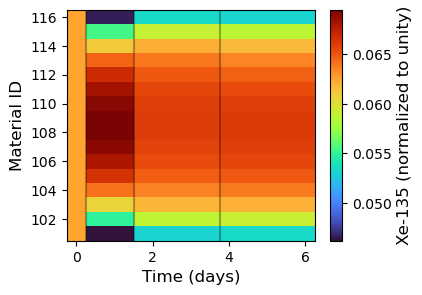

In [81]:
xe135arr = out.plot_BOS_isotopics_map(isotope='Xe-135',
                       normalize=True, figsize=(4,3), cmap='turbo', fontsize=12, fontname=globalfont)

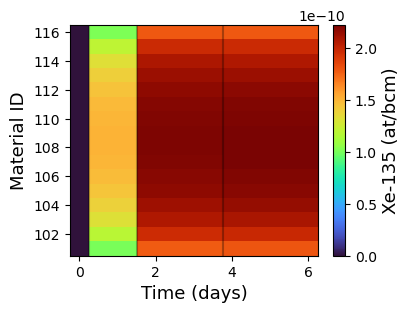

In [82]:
xe135arr = out.plot_BOS_isotopics_map(isotope='Xe-135',
                       normalize=False, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

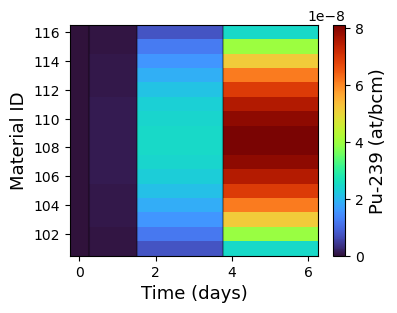

In [83]:
pu239arr = out.plot_BOS_isotopics_map(isotope='Pu-239',
                       normalize=False, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

In [84]:
# plotting isotopics at end of every substep --->
# not working now but save for later when we make plot_all_isotopics_map

iso = 'U-235'

fissile_materials = out.BOS_power[0].keys()
for bigStep in out.isotopics_all.keys():
  for substep in out.isotopics_all[bigStep].keys():
    atom_dens_row = np.array([])
    for mat in fissile_materials:
      atom_dens_row = np.append(atom_dens_row, out.isotopics_all[bigStep][substep].material_dict[mat].return_iso_atom_dens(iso))



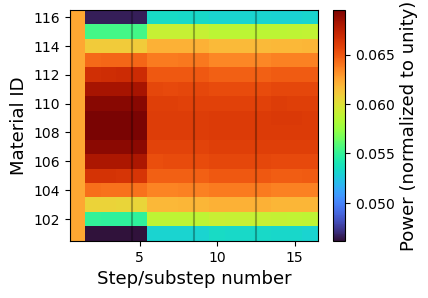

In [90]:
parr = out.plot_all_isotopics_map(isotope='Xe-135',
                       normalize=True, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

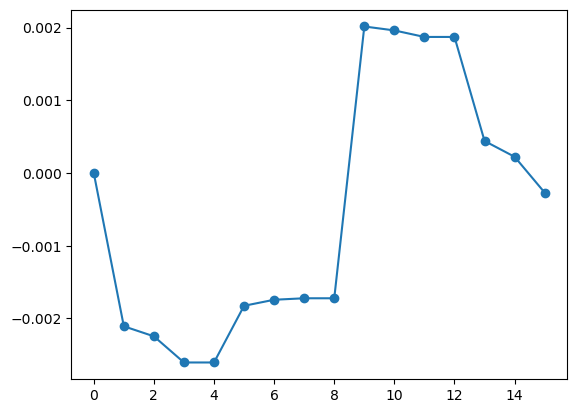

In [86]:
offset = []
for step in range(np.shape(parr)[1]):
  top = 0.0
  bottom = 0.0
  for mat in range(np.shape(parr)[0]):
    if mat <= 7:
      top += parr[mat,step]
    else:
      bottom += parr[mat,step]
  offset += [(top-bottom)/(top+bottom)]
plt.plot(offset, '-o')




In [87]:
a = []
a += [1]
a += [5]
a


[1, 5]

In [88]:
np.shape(parr)

(16, 16)

In [89]:
out.power_all

{0: {-1: {101: 0.026490132450662247,
   102: 0.038370191850959245,
   103: 0.050890254451272245,
   104: 0.061835309176545866,
   105: 0.07094535472677362,
   106: 0.07818039090195449,
   107: 0.08317541587707937,
   108: 0.08595042975214874,
   109: 0.08605043025215124,
   110: 0.08379541897709486,
   111: 0.07922539612698062,
   112: 0.07232036160180798,
   113: 0.06316531582657911,
   114: 0.05209526047630237,
   115: 0.03936519682598412,
   116: 0.027005135025675118},
  0: {101: 0.028040140200701003,
   102: 0.039970199850999255,
   103: 0.052115260576302884,
   104: 0.062380311901559515,
   105: 0.07070535352676764,
   106: 0.076880384401922,
   107: 0.081120405602028,
   108: 0.08332041660208303,
   109: 0.08332041660208303,
   110: 0.08167540837704189,
   111: 0.07812039060195301,
   112: 0.07243036215181077,
   113: 0.06447032235161176,
   114: 0.05396526982634913,
   115: 0.04143520717603589,
   116: 0.028870144350721758},
  1: {101: 0.02820985895070525,
   102: 0.040349798251